In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/field-of-study-vs-occupation/career_change_prediction_dataset.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Create function to load a new DataFrame
def load_new_dataframe(filename):
    try: 
        df = pd.read_csv(filename)
    except: 
        print("Unable to load {filename}! Please check file location and try again!")
    
    return df
    
df = load_new_dataframe("/kaggle/input/field-of-study-vs-occupation/career_change_prediction_dataset.csv")


## Data Preparation

In [4]:
# Count the number of null values
df.isnull().sum()

Field of Study                    0
Current Occupation                0
Age                               0
Gender                            0
Years of Experience               0
Education Level                   0
Industry Growth Rate              0
Job Satisfaction                  0
Work-Life Balance                 0
Job Opportunities                 0
Salary                            0
Job Security                      0
Career Change Interest            0
Skills Gap                        0
Family Influence               9632
Mentorship Available              0
Certifications                    0
Freelancing Experience            0
Geographic Mobility               0
Professional Networks             0
Career Change Events              0
Technology Adoption               0
Likely to Change Occupation       0
dtype: int64

In [5]:
# Check the proportion of missing values.
df.isnull().mean()

Field of Study                 0.000000
Current Occupation             0.000000
Age                            0.000000
Gender                         0.000000
Years of Experience            0.000000
Education Level                0.000000
Industry Growth Rate           0.000000
Job Satisfaction               0.000000
Work-Life Balance              0.000000
Job Opportunities              0.000000
Salary                         0.000000
Job Security                   0.000000
Career Change Interest         0.000000
Skills Gap                     0.000000
Family Influence               0.250546
Mentorship Available           0.000000
Certifications                 0.000000
Freelancing Experience         0.000000
Geographic Mobility            0.000000
Professional Networks          0.000000
Career Change Events           0.000000
Technology Adoption            0.000000
Likely to Change Occupation    0.000000
dtype: float64

In [6]:
# Impute missing categorical values
df['Family Influence'].fillna('Unknown', inplace=True)

In [7]:
# Identify categorical columns and convert them to 'category' dtype
categorical_columns = df.select_dtypes(include='object').columns

# Identify integer columns and convert them to 'int32' dtype
int_columns = df.select_dtypes(include='int64').columns

# Assign categorical data to DataFrames
df[categorical_columns] = df[categorical_columns].astype('category')

# Assign integer data to DataFrames
df[int_columns] = df[int_columns].astype('int32')


# Exploratory Data Analysis

## Inspect the Dataset

In [8]:
# Display the first 5 rows of data
df.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


In [9]:
# Display non-null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Field of Study               38444 non-null  category
 1   Current Occupation           38444 non-null  category
 2   Age                          38444 non-null  int32   
 3   Gender                       38444 non-null  category
 4   Years of Experience          38444 non-null  int32   
 5   Education Level              38444 non-null  category
 6   Industry Growth Rate         38444 non-null  category
 7   Job Satisfaction             38444 non-null  int32   
 8   Work-Life Balance            38444 non-null  int32   
 9   Job Opportunities            38444 non-null  int32   
 10  Salary                       38444 non-null  int32   
 11  Job Security                 38444 non-null  int32   
 12  Career Change Interest       38444 non-null  int32   
 13  S

In [10]:
# Display descriptive statistics for numerical dtypes
numerical_summary = df.describe()

# Print the summary for a quick inspection
display(numerical_summary)

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,39.540422,19.548200,5.489673,5.517012,50.308267,114975.623999,5.481896,0.199901,5.520133,0.299943,0.298616,0.149204,0.303975,5.514098,1.003304,5.487904,0.576553
std,11.574509,11.552474,2.870407,2.879007,28.877294,48963.725598,2.870640,0.399931,2.870065,0.458239,0.457657,0.356294,0.459978,2.868188,0.815953,2.857247,0.494111
min,20.000000,0.000000,1.000000,1.000000,1.000000,30005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,30.000000,10.000000,3.000000,3.000000,25.000000,72701.500000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000
50%,40.000000,20.000000,6.000000,6.000000,50.000000,114861.000000,5.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,5.000000,1.000000
75%,50.000000,30.000000,8.000000,8.000000,75.000000,157241.000000,8.000000,0.000000,8.000000,1.000000,1.000000,0.000000,1.000000,8.000000,2.000000,8.000000,1.000000
max,59.000000,39.000000,10.000000,10.000000,100.000000,199996.000000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2.000000,10.000000,1.000000


In [11]:
# Describe the categorical columns to get summary statistics (counts, unique, top, freq)
categorical_summary = df[categorical_columns].describe()

# Print the summary for a quick inspection
display(categorical_summary)

,Field of Study,Current Occupation,Gender,Education Level,Industry Growth Rate,Family Influence
count,38444,38444,38444,38444,38444,38444
unique,10,10,2,4,3,4
top,Medicine,Software Developer,Female,PhD,High,High
freq,3949,3892,19299,9777,12968,9635


In [12]:
df.shape

(38444, 23)

## Explore Value Distributions

### Count occurrences of unique values in categorical columns

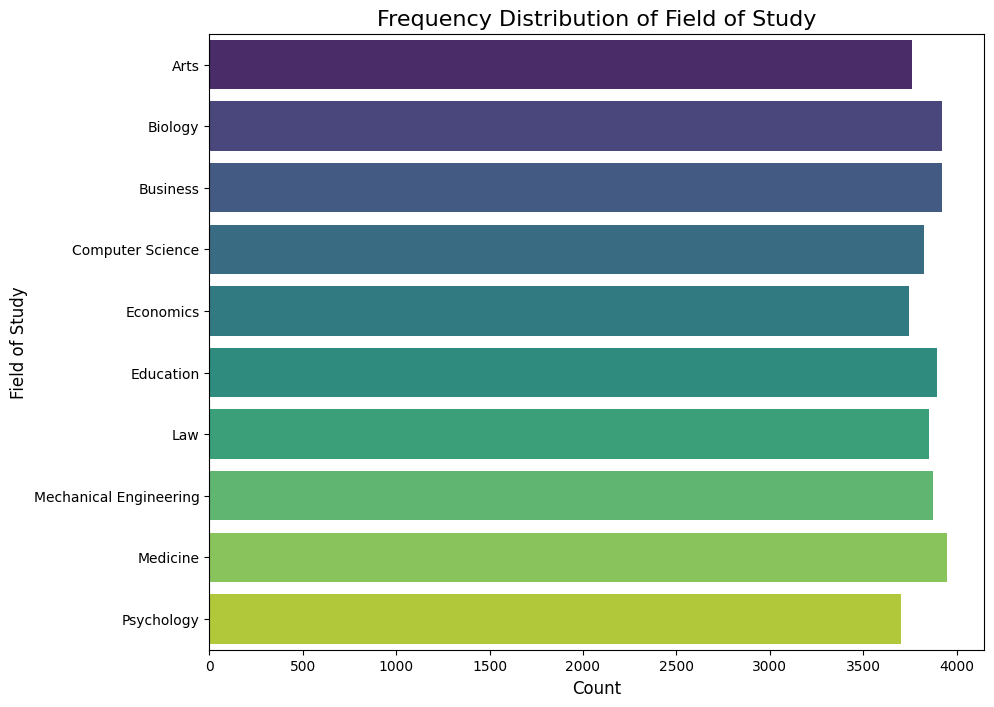

In [13]:
# Calculate value counts and sort
fos_value_counts = df['Field of Study'].value_counts().reset_index()
fos_value_counts.columns = ['Field of Study', 'Count']
fos_value_counts = fos_value_counts.sort_values(by='Count', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Field of Study', data=fos_value_counts, palette='viridis')
plt.title('Frequency Distribution of Field of Study', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Field of Study', fontsize=12)
plt.show()

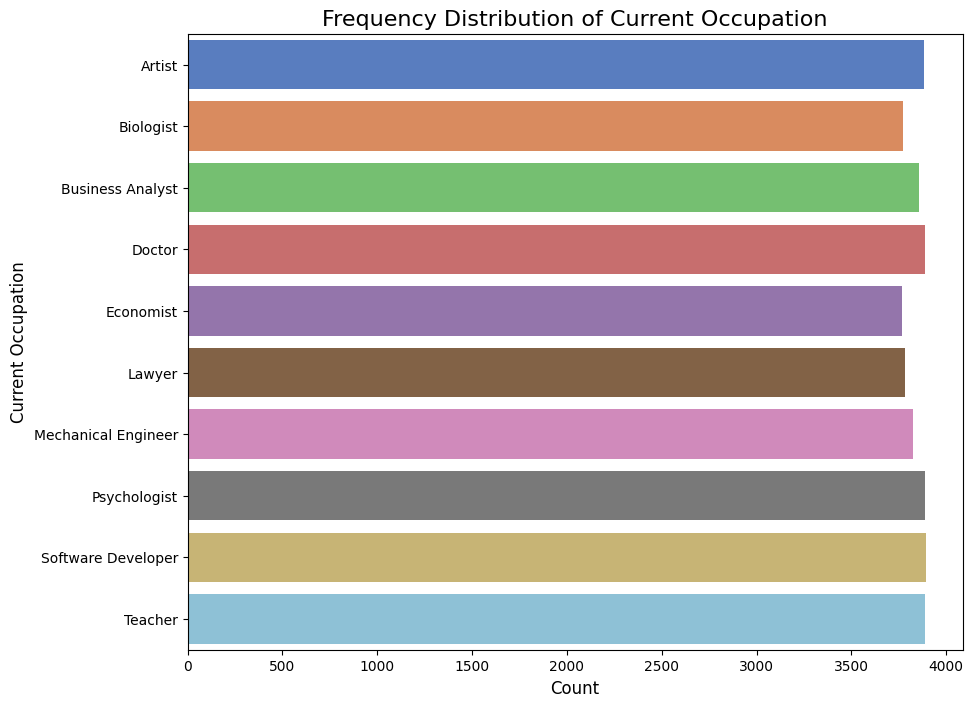

In [14]:
# Calculate value counts and sort
occupation_value_counts = df['Current Occupation'].value_counts().reset_index()
occupation_value_counts.columns = ['Current Occupation', 'Count']
occupation_value_counts = occupation_value_counts.sort_values(by='Count', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Current Occupation', data=occupation_value_counts, palette='muted')
plt.title('Frequency Distribution of Current Occupation', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Current Occupation', fontsize=12)
plt.show()



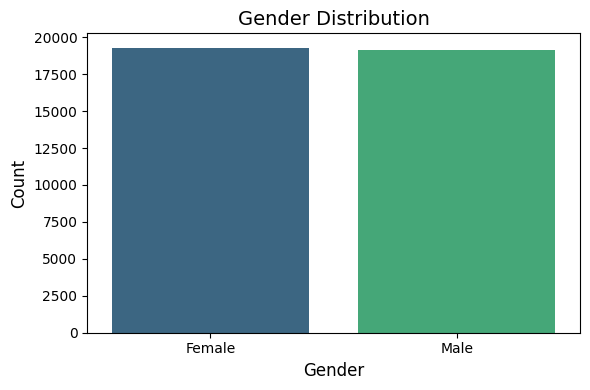

In [15]:
# Calculate value counts and sort
gender_value_counts = df['Gender'].value_counts().reset_index()
gender_value_counts.columns = ['Gender', 'Count']
gender_value_counts = gender_value_counts.sort_values(by='Count', ascending=False)

# Create a vertical bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Count', data=gender_value_counts, palette='viridis')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


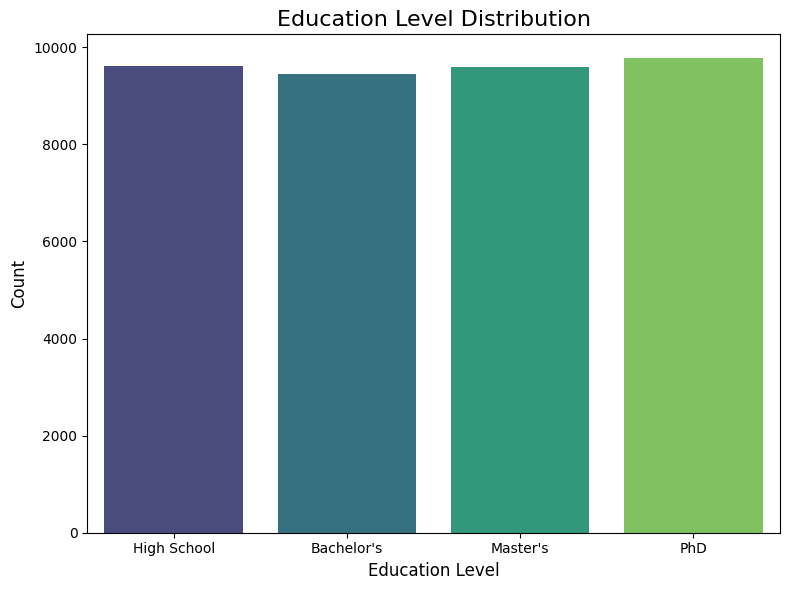

In [16]:
# Calculate value counts and reset the index
education_value_counts = df['Education Level'].value_counts().reset_index()
education_value_counts.columns = ['Education Level', 'Count']

# Define the correct order for ordinal data
education_order = ['High School', "Bachelor's", "Master's", 'PhD']

# Sort the values by the custom education level order
education_value_counts['Education Level'] = pd.Categorical(education_value_counts['Education Level'], categories=education_order, ordered=True)
education_value_counts = education_value_counts.sort_values(by='Education Level').reset_index(drop=True)

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Education Level', y='Count', data=education_value_counts, palette='viridis')
plt.title('Education Level Distribution', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



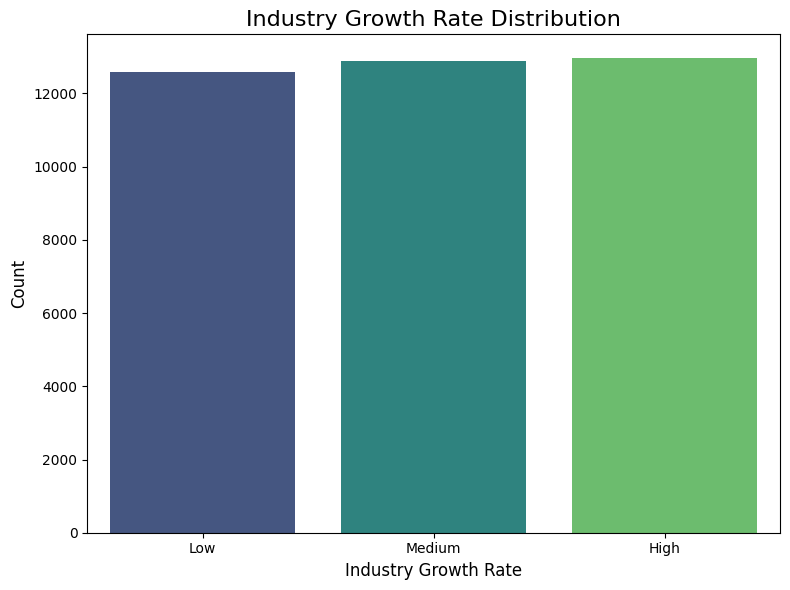

In [17]:
# Calculate value counts and reset the index
growth_value_counts = df['Industry Growth Rate'].value_counts().reset_index()
growth_value_counts.columns = ['Industry Growth Rate', 'Count']

# Define the correct order for ordinal data
growth_value_order = ['Low', "Medium", "High"]

# # Sort the values by the custom education level order
growth_value_counts['Industry Growth Rate'] = pd.Categorical(growth_value_counts['Industry Growth Rate'], categories=growth_value_order, ordered=True)
growth_value_counts = growth_value_counts.sort_values(by='Industry Growth Rate').reset_index(drop=True)

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Industry Growth Rate', y='Count', data=growth_value_counts, palette='viridis')
plt.title('Industry Growth Rate Distribution', fontsize=16)
plt.xlabel('Industry Growth Rate', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

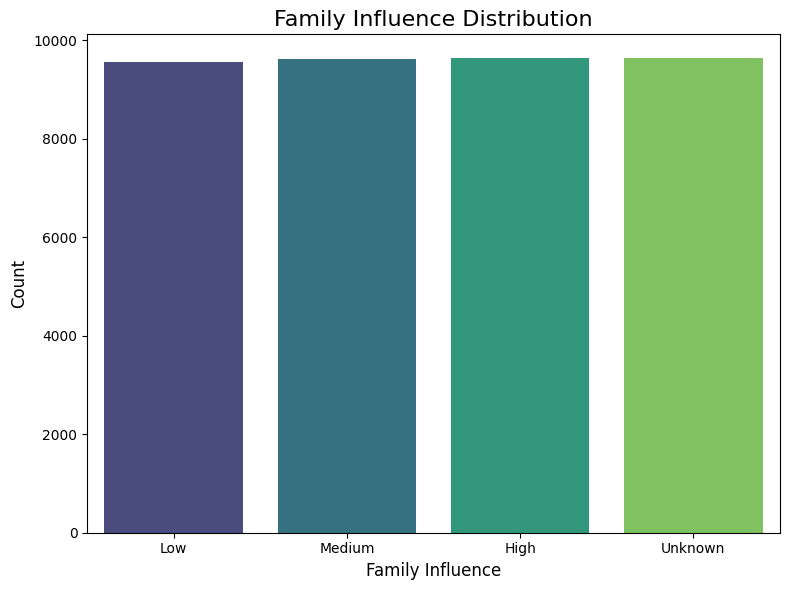

In [18]:
# Calculate value counts and reset the index
influence_value_counts = df['Family Influence'].value_counts().reset_index()
influence_value_counts.columns = ['Family Influence', 'Count']

# Define the correct order for ordinal data
influence_value_order = ['Low', "Medium", "High", "Unknown"]

# Sort the values by the custom education level order
influence_value_counts['Family Influence'] = pd.Categorical(influence_value_counts['Family Influence'], categories=influence_value_order, ordered=True)
influence_value_counts = influence_value_counts.sort_values(by='Family Influence').reset_index(drop=True)

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Family Influence', y='Count', data=influence_value_counts, palette='viridis')
plt.title('Family Influence Distribution', fontsize=16)
plt.xlabel('Family Influence', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Check distributions for numerical columns

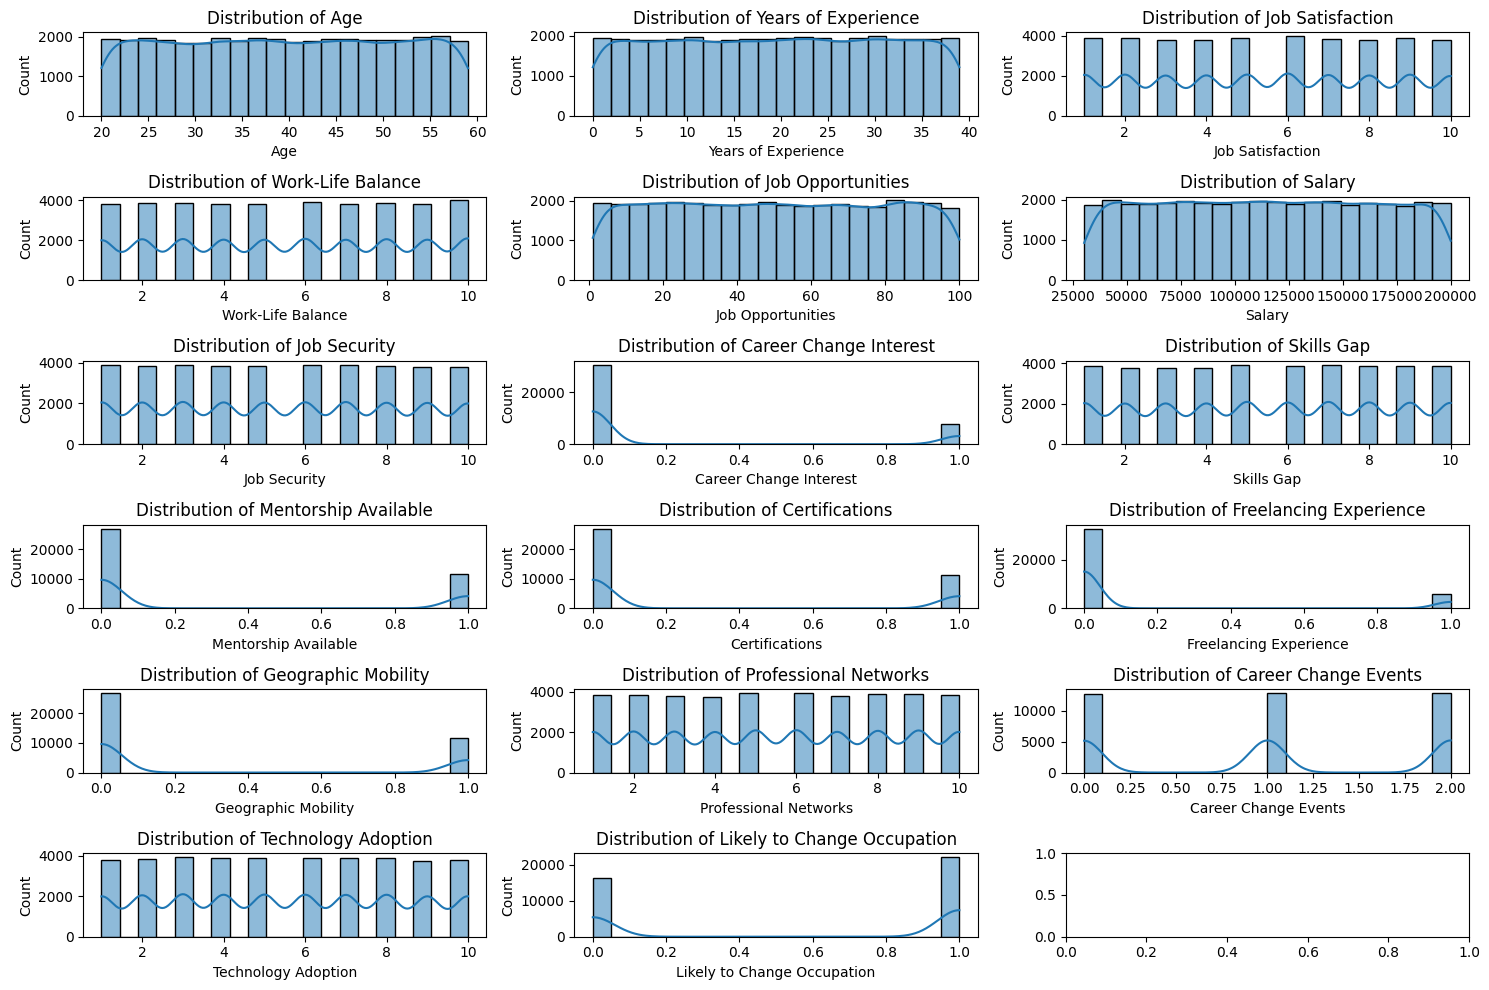

In [19]:
# Create subplots: Adjust the size based on the number of columns
fig, axes = plt.subplots(nrows=len(int_columns)//3 + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Step 2: Plot each column in a separate subplot
for i, column in enumerate(int_columns):
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Step 3: Adjust layout and show plot
plt.tight_layout()
plt.show()


## Identify and Handle Duplicates

In [20]:
df.duplicated().sum()

0

## Check for Outliers

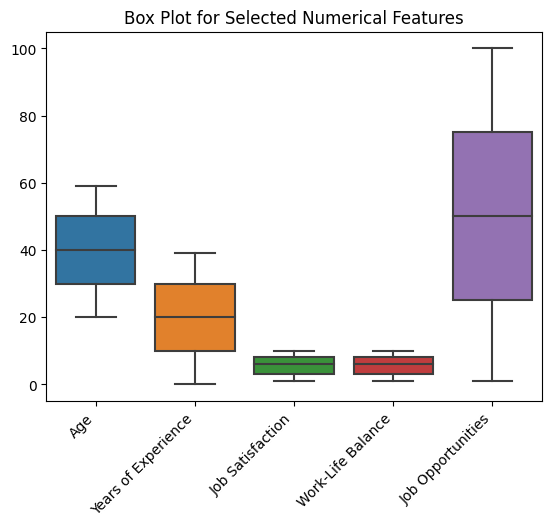

In [21]:
# Select a subset of columns (e.g., top 5 numerical columns)
subset_columns = df.select_dtypes(include='number').columns[:5]

# Create the box plot for the selected columns
sns.boxplot(data=df[subset_columns])

# Rotate the labels if necessary
plt.xticks(rotation=45, ha='right')

# Add a title and show the plot
plt.title('Box Plot for Selected Numerical Features')
plt.show()

## Analyze Relationships

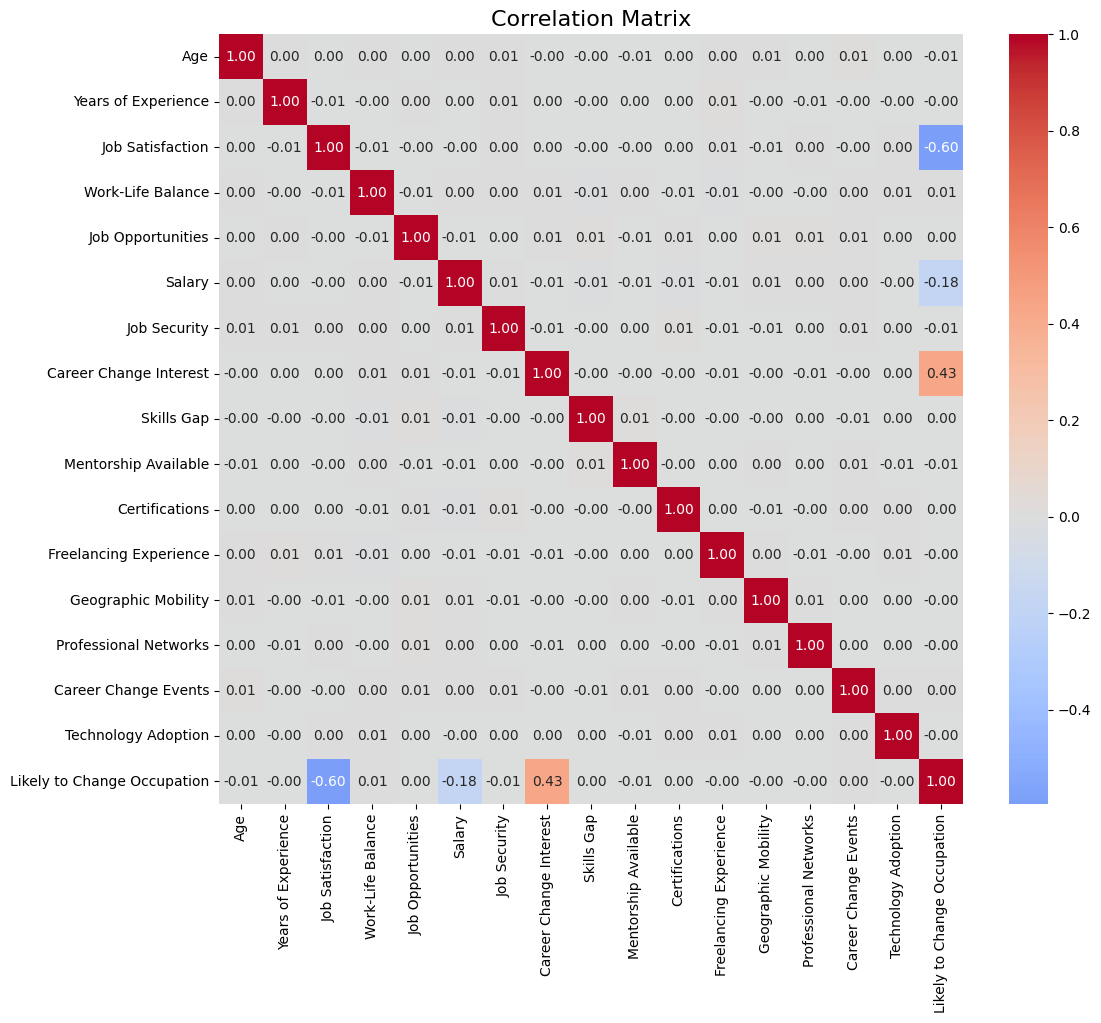

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[int_columns].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()
